##Reinforcement Learning Using Cartpole Environment

OpenAi provides us with a library called 'gym', consisting of various popular environments for Reinforcement Learning. We implement the same in an environment called "Cartpole".




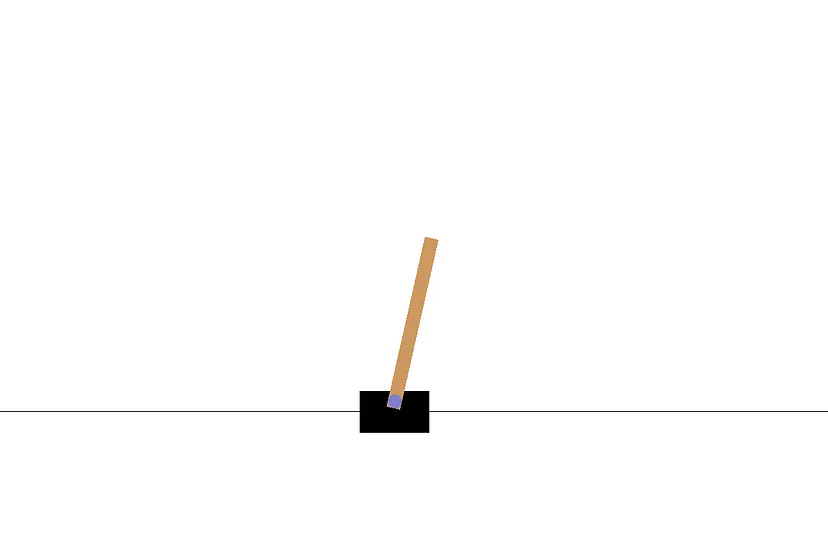

The agent is the cart, controlled by two possible actions +1, -1 pointing on moving left or right. The reward +1 is given at every timestep if the pole remains upright. The goal is to prevent the pole from falling over(maximize total reward) as in GIF above. After 100 consecutive timesteps and an average reward of 195, the problem is considered solved.The episode ends when the pole is more than 15 degrees from vertical or the cart moves more than 2.4 units from the center.

In [2]:
import numpy as np
import gym
import time
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
env = gym.make("CartPole-v1")
print(env.action_space.n) #number of actions the agent can perform

2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:
LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 6000
total = 0
total_reward = 0
prior_reward = 0

Observation = [30, 30, 50, 50]  #30 possible values of cart position, cart Velocity and 50 of pole Angle, pole velocity
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])   #not really sure lol(discreetization of values of cart position, cart velocity, pole angle and pole velocity)?

epsilon = 1
min_epsilon = 0.01
epsilon_decay_value = 0.99995

In [5]:
q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
q_table.shape

(30, 30, 50, 50, 2)

In [6]:
def get_discrete_state(state):
    discrete_state = state/np_array_win_size+ np.array([15,10,1,10])
    return tuple(discrete_state.astype(np.int))

In [7]:
# Initialize a list to store epsilon values for each episode
epsilon_values = []


# Training phase: Q-learning algorithm
for episode in range(EPISODES):
    # Reset the environment and get the initial state
    discrete_state = get_discrete_state(env.reset())
    done = False

    while not done:
        # Choose an action using epsilon-greedy strategy
        if np.random.random() > epsilon:
            # Exploit: Choose the action with the highest Q-value for the current state
            action = np.argmax(q_table[discrete_state])
        else:
            # Explore: Choose a random action
            action = np.random.randint(0, env.action_space.n)

        # Take the chosen action and observe the new state, reward, and termination status
        new_state, reward, done, _ = env.step(action)

        # Discretize the new state to get its discrete representation
        new_discrete_state = get_discrete_state(new_state)

        if not done:
            # Update the Q-value for the current state-action pair
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table[discrete_state + (action,)] = new_q
        elif new_state[0] >= env.unwrapped.x_threshold:
            # The cart moved too far to the right, consider it as a successful episode
            q_table[discrete_state + (action,)] = 0

        # Update the current state for the next iteration
        discrete_state = new_discrete_state

    # Decay epsilon to reduce exploration over time
    epsilon = max(min_epsilon, epsilon * epsilon_decay_value)
    # Append the current epsilon value to the list
    epsilon_values.append(epsilon)

    # Print progress: Every 100 episodes, print the episode number and the current epsilon value
    if episode % 100 == 0:
        print(f"Episode: {episode}, Epsilon: {epsilon}")

# Evaluation phase: Run the trained Q-learning agent
env.reset()
done = False

while not done:
    # Choose the action with the highest Q-value for the current state
    discrete_state = get_discrete_state(env.state)
    action = np.argmax(q_table[discrete_state])

    # Take the chosen action and observe the new state and termination status
    new_state, _, done, _ = env.step(action)


# Close the environment after the evaluation phase
env.close()

<ipython-input-6-668c2ba4a5cb>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


Episode: 0, Epsilon: 0.99995
Episode: 100, Epsilon: 0.9949626041942441
Episode: 200, Epsilon: 0.9900000837491787
Episode: 300, Epsilon: 0.9850623145953326
Episode: 400, Epsilon: 0.9801491732820453
Episode: 500, Epsilon: 0.9752605369743877
Episode: 600, Epsilon: 0.9703962834500862
Episode: 700, Epsilon: 0.9655562910964683
Episode: 800, Epsilon: 0.9607404389074233
Episode: 900, Epsilon: 0.9559486064803754
Episode: 1000, Epsilon: 0.9511806740132733
Episode: 1100, Epsilon: 0.9464365223015981
Episode: 1200, Epsilon: 0.9417160327353786
Episode: 1300, Epsilon: 0.9370190872962292
Episode: 1400, Epsilon: 0.9323455685543972
Episode: 1500, Epsilon: 0.9276953596658292
Episode: 1600, Epsilon: 0.923068344369248
Episode: 1700, Epsilon: 0.9184644069832454
Episode: 1800, Epsilon: 0.9138834324033923
Episode: 1900, Epsilon: 0.9093253060993586
Episode: 2000, Epsilon: 0.904789914112052
Episode: 2100, Epsilon: 0.9002771430507663
Episode: 2200, Epsilon: 0.895786880090349
Episode: 2300, Epsilon: 0.89131901296

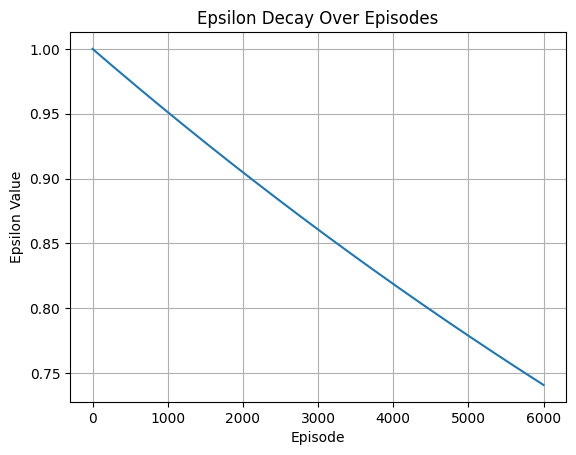

In [8]:
# Plot epsilon values vs. episodes
plt.plot(range(EPISODES), epsilon_values)
plt.xlabel("Episode")
plt.ylabel("Epsilon Value")
plt.title("Epsilon Decay Over Episodes")
plt.grid(True)
plt.show()